# Assess key marker gene gene in MUC6 cells and intestinal epithelial cells
- looking across donors and studies for sanity check
- LEFTY1 plots in paper in this notebook

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import drug2cell as d2c

In [2]:
sc.logging.print_header()

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/umap/distances.py:108

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 pynndescent==0.5.10


/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/all_muc6_cells_rawcounts_20230613.h5ad')

In [5]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/all_muc6_cells_rawcounts_20230613.csv',index_col=0)

/tmp/ipykernel_3463/1900605583.py:1: DtypeWarning: Columns (62,63,64,65,66,67,70,84,100,101,102,105,112,113,114,115,117,119,123,124,125,126,127,128,129,130,131,132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/all_muc6_cells_rawcounts_20230613.csv',index_col=0)


In [6]:
adata

AnnData object with n_obs × n_vars = 19058 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [7]:
adata.X.max()

18131.0

In [8]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [9]:
adata.raw = adata

In [10]:
sc.pp.log1p(adata)

In [11]:
adata.X.max()

8.404984

In [12]:
adata.obs['disease_organ'] = adata.obs['disease'].astype(str)+'_'+adata.obs['organ_unified'].astype(str)

In [13]:
adata.obs['disease_organ'].value_counts()

neighbouring_cancer_stomach     11669
cancer_gastric_stomach           6136
control_stomach                   567
inutero_stomach                   369
crohns_disease_ileum              159
control_duodenum                   71
neighbouring_inflammed_ileum       32
celiac_active_duodenum             24
inutero_duodenum                   19
pediatric_IBD_ileum                 8
control_jejunum                     2
control_ileum                       1
celiac_treated_duodenum             1
Name: disease_organ, dtype: int64

In [14]:
adata = adata[~adata.obs.disease_organ.isin(['control_jejunum','control_ileum','celiac_treated_duodenum'])].copy()

In [15]:
list(adata.obs['disease'].unique())

['control',
 'inutero',
 'neighbouring_cancer',
 'pediatric_IBD',
 'crohns_disease',
 'cancer_gastric',
 'neighbouring_inflammed',
 'celiac_active']

In [16]:
order = ['control',
 'inutero',
  'celiac_active',
 
 'crohns_disease',
         'pediatric_IBD',
         'neighbouring_inflammed',
 'cancer_gastric',
 

        'neighbouring_cancer',]

In [17]:
import scipy.sparse
import anndata
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

from scanpy.pl._dotplot import DotPlot

def dotplot_2obs(adata, gene, x_axis, y_axis, x_order=None, y_order=None, use_raw=True, fill_na=True, output_file=None):
    """
    A function that extracts the expression for a provided gene, 
    and subsequently prepares a dotplot where the two axes are 
    two categoricals from the obs of the object.
    
    Can be controlled between .raw and .X via use_raw (defaults to raw)
    By default fills nonexistent obs combinations as zeroes in the plot
    (as otherwise the plot can error in weird ways sometimes)
    """
    #prepare dfs with dot sizes and colours
    #start off by making a helper df with all the info
    obs_tidy_master = adata.obs[[y_axis,x_axis]].set_index(y_axis)
    #add gene expression
    if use_raw:
        if scipy.sparse.issparse(adata.raw.X):
            obs_tidy_master[gene] = adata.raw[:,gene].X.todense()
        else:
            obs_tidy_master[gene] = np.array(adata.raw[:,gene].X)
    else:
        if scipy.sparse.issparse(adata.X):
            obs_tidy_master[gene] = adata[:,gene].X.todense()
        else:
            obs_tidy_master[gene] = np.array(adata[:,gene].X)
    #this is where our computed values will go
    dot_size_df = pd.DataFrame(0, index=np.unique(obs_tidy_master.index), columns = np.unique(obs_tidy_master[x_axis]))
    #reorder the groups if specified
    if x_order is not None:
        dot_size_df = dot_size_df[x_order]
    if y_order is not None:
        dot_size_df = dot_size_df.loc[y_order,:]
    dot_color_df = dot_size_df.copy()
    #compute the sizes and colors, replicating the logic found within DotPlot()
    for cat in dot_size_df.columns:
        obs_tidy = obs_tidy_master.loc[obs_tidy_master[x_axis]==cat, gene]
        obs_bool = obs_tidy > 0
        dot_color_df[cat] = obs_tidy.groupby(level=0).mean().fillna(0)
        dot_size_df[cat] = obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
    #some combinations may be absent, and there will be NaNs there, and this sometimes kills the plot
    #fill with zeroes if specified
    if fill_na:
        dot_color_df.fillna(0, inplace=True)
        dot_size_df.fillna(0, inplace=True)
    #in order to actually plot this, we need to make a dummy anndata object
    #just how DotPlot() is wired internally
    bdata = anndata.AnnData(np.zeros(dot_size_df.shape))
    bdata.var_names = dot_size_df.columns
    #this needs to be turned to a list or it whines about a conflict later
    bdata.obs_names = list(dot_size_df.index)
    #the grouping variable needs to be present in the dummy object
    #its existence is checked, it actually does nothing when we insert the dot sizes
    bdata.obs[y_axis] = dot_size_df.index
    #actually make the dotplot, with the best colour scheme :P
    dp = DotPlot(bdata, dot_size_df.columns, y_axis, dot_size_df=dot_size_df, dot_color_df=dot_color_df, title=gene)
    dp = dp.style(cmap='OrRd')
    dp.make_figure()
    fig = plt.gcf()  # Get the current figure
    
    if output_file is not None:
        fig.savefig(output_file)
    
    return fig


/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


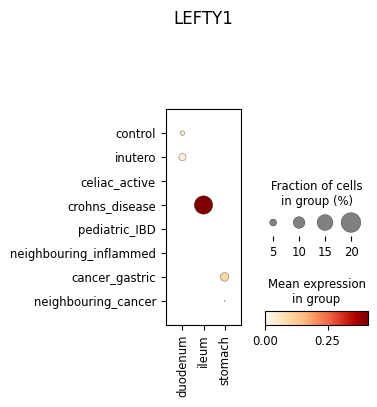

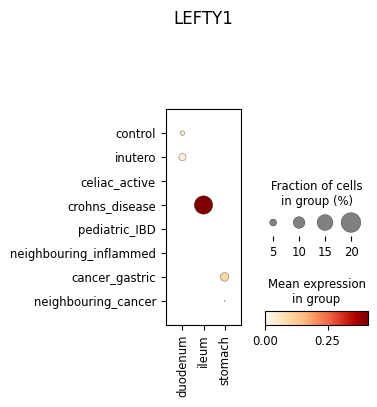

In [18]:
dotplot_2obs(adata,gene = "LEFTY1",x_axis="organ_unified", y_axis="disease",y_order=order,output_file='LEFTY1_muc6expression.pdf',)

In [19]:
bdata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.h5ad')

In [20]:
bdata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/tmp/ipykernel_3463/2023178834.py:1: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  bdata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)


In [21]:
bdata.X.max()

9.066531

In [22]:
bdata.raw = bdata

In [23]:
bdata.obs['disease2'] = (
    bdata.obs["disease"]
    .map(lambda x: {'pediatric_IBD':'crohns_disease',
 'crohns_disease':'crohns_disease',
        
         }.get(x, x))
    .astype("category")
)

In [24]:
bdata.obs.disease2.value_counts()

neighbouring_inflammed    103593
control                    74154
crohns_disease             29692
neighbouring_cancer         8121
neighbouring_polyps         4710
celiac_active                896
celiac_treated               734
Name: disease2, dtype: int64

In [25]:
bdata = bdata[bdata.obs.disease2.isin(['neighbouring_inflammed',
'control',
'crohns_disease'])].copy()

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


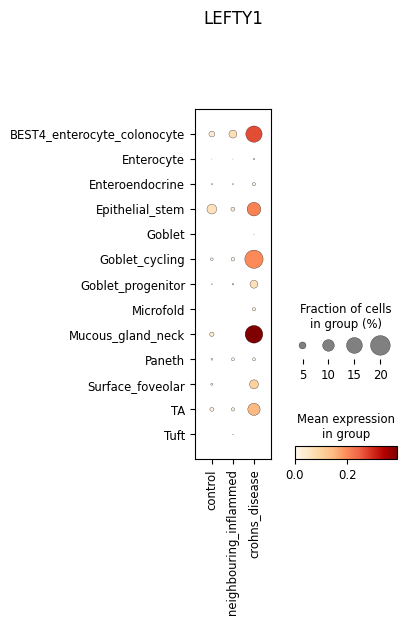

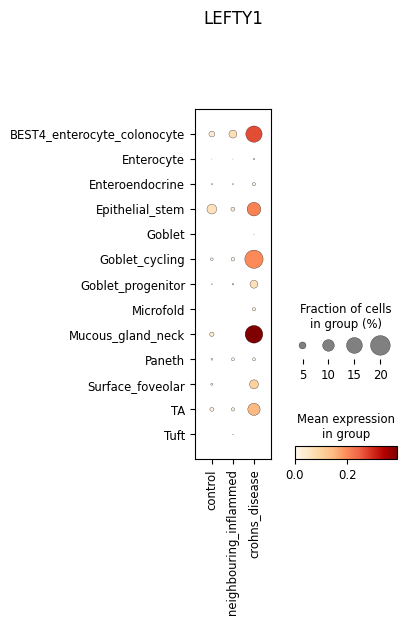

In [26]:
#LEFTY1 expression - Extended data 8i
dotplot_2obs(bdata,gene = "LEFTY1",y_axis="level_3_annot", x_axis="disease2",output_file='LEFTY1_SIcellsexpression_simple.pdf',x_order=['control','neighbouring_inflammed','crohns_disease'])

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


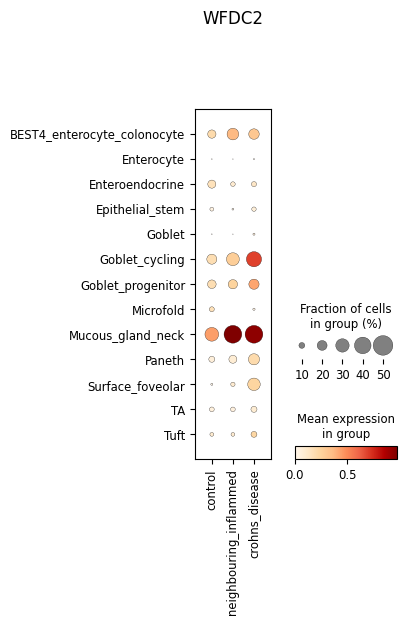

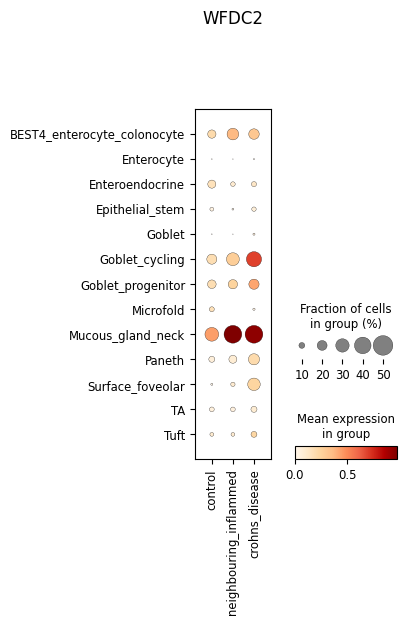

In [27]:
dotplot_2obs(bdata,gene = "WFDC2",y_axis="level_3_annot", x_axis="disease2",output_file='WFDC2_SIcellsexpression_simple.pdf',x_order=['control','neighbouring_inflammed','crohns_disease'])

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


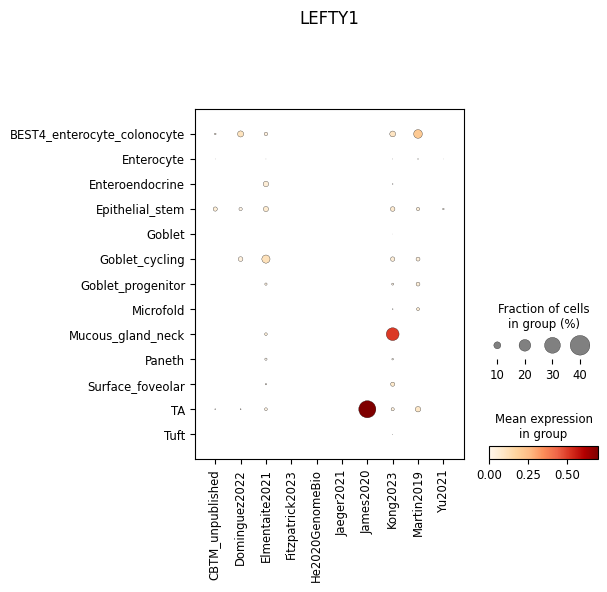

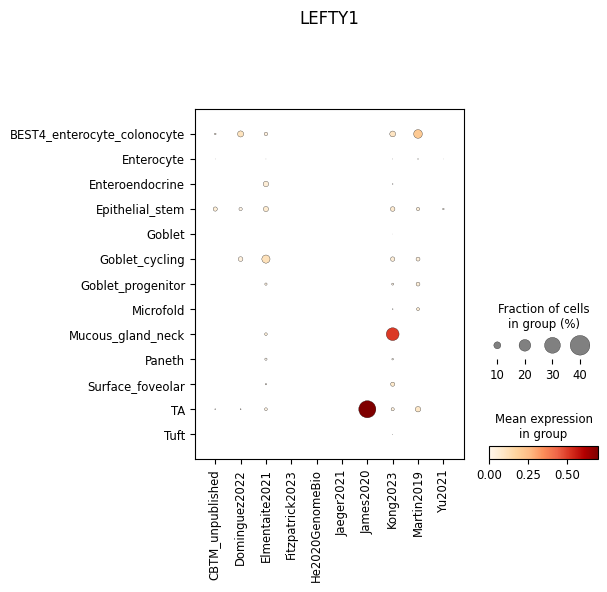

In [28]:
dotplot_2obs(bdata,gene = "LEFTY1",y_axis="level_3_annot", x_axis="study",output_file='LEFTY1_SIcellsexpression_simple_expressionbystudy.pdf')

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


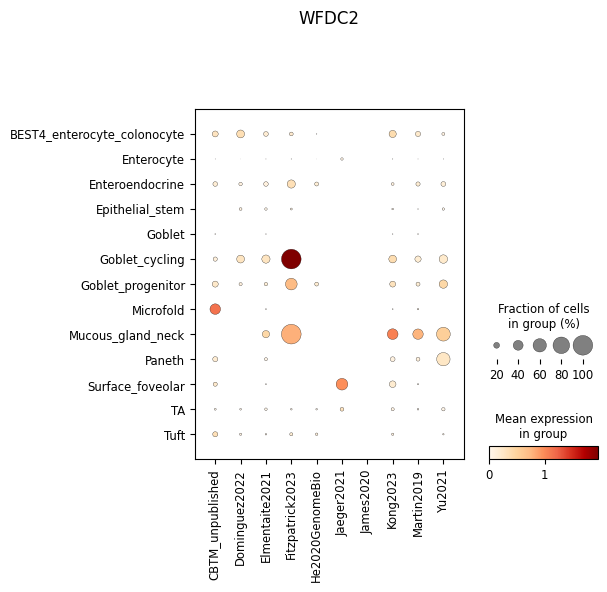

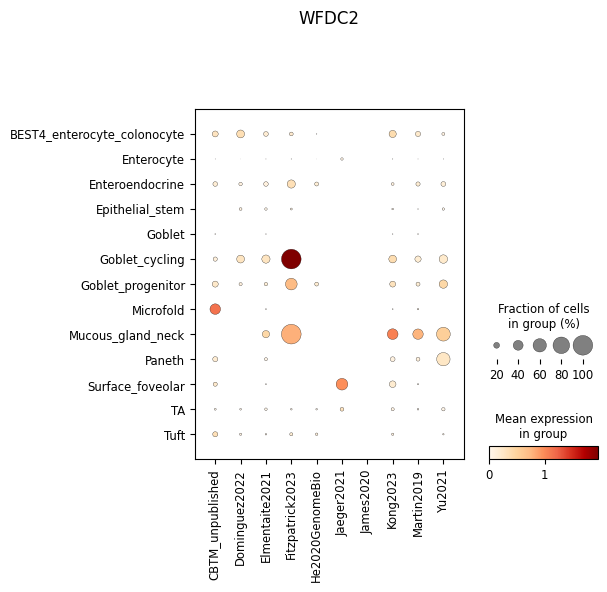

In [29]:
dotplot_2obs(bdata,gene = "WFDC2",y_axis="level_3_annot", x_axis="study")

In [30]:
bdata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.h5ad')

In [31]:
bdata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/tmp/ipykernel_3463/2023178834.py:1: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  bdata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)


In [32]:
bdata.obs.study.value_counts()

Kong2023            147244
Elmentaite2021       34790
Martin2019           11932
Wang2020              8121
CBTM_unpublished      5150
Dominguez2022         5039
Yu2021                4028
He2020GenomeBio       3254
Fitzpatrick2023       2300
Jaeger2021              39
James2020                3
Name: study, dtype: int64

In [33]:
plot = bdata[bdata.obs.disease.isin(['crohns_disease','celiac_active','pediatric_IBD'])].copy()

In [34]:
plot.raw = plot

In [35]:
plot_without_jaeger = plot[~plot.obs.study.isin(['Jaeger2021'])].copy()

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for

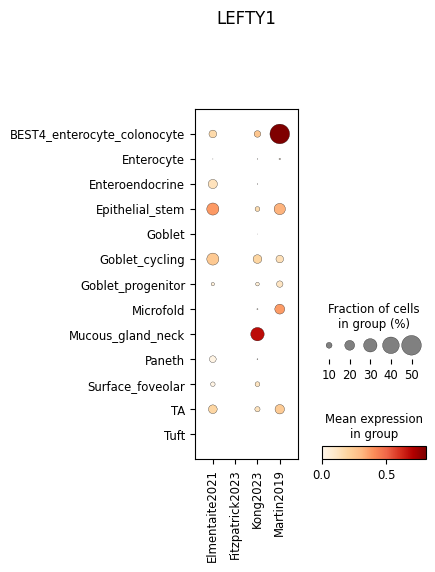

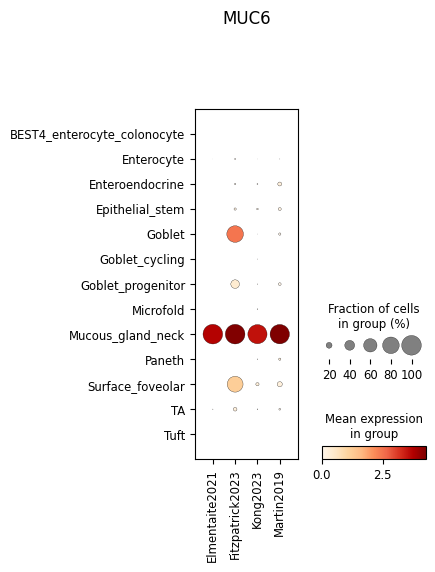

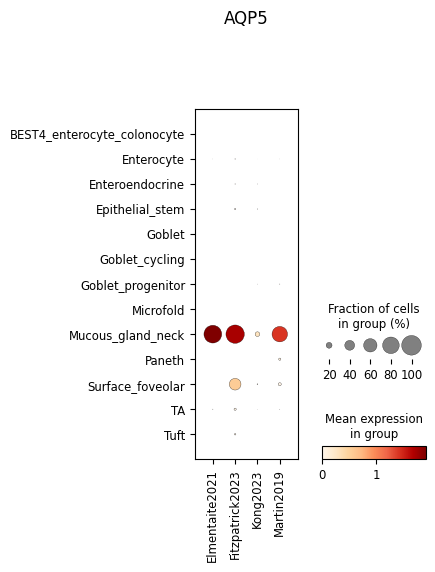

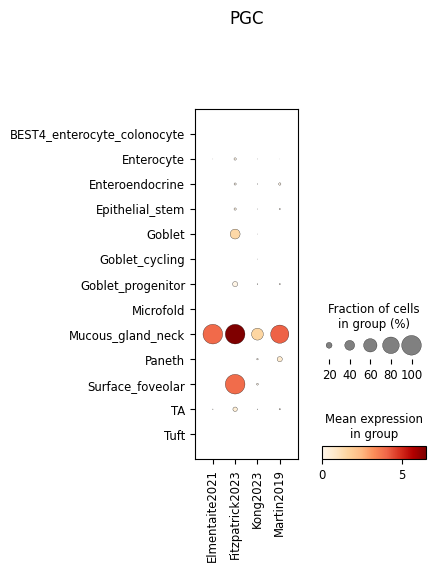

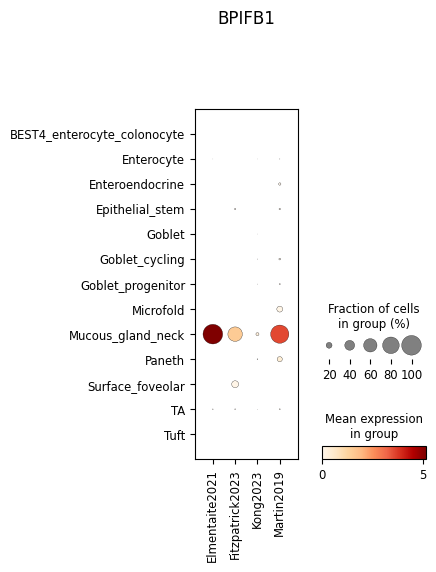

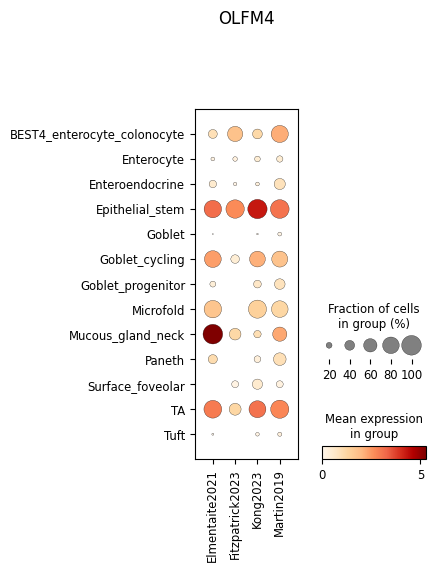

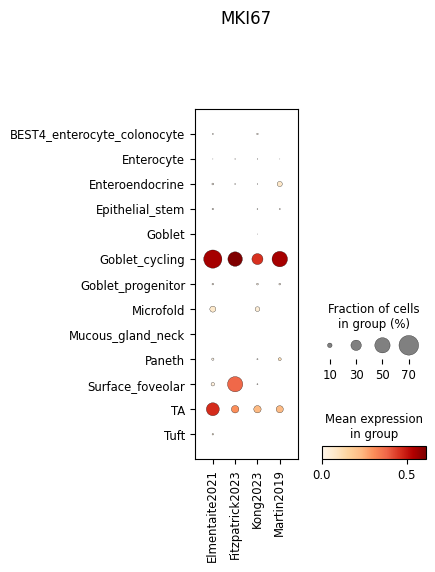

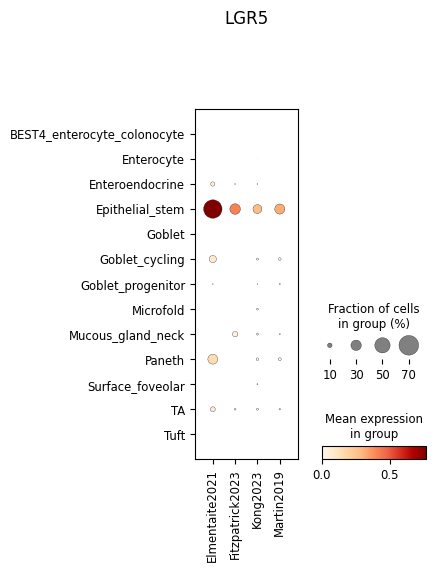

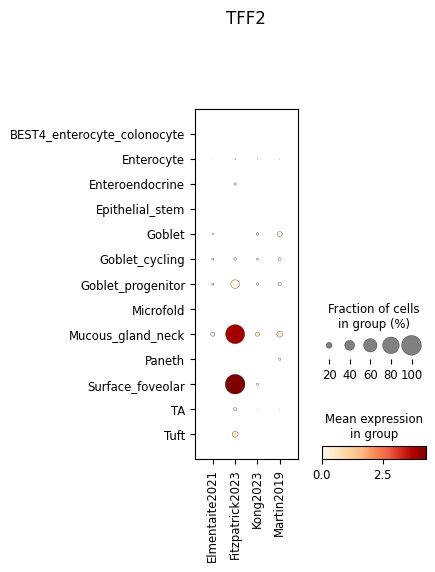

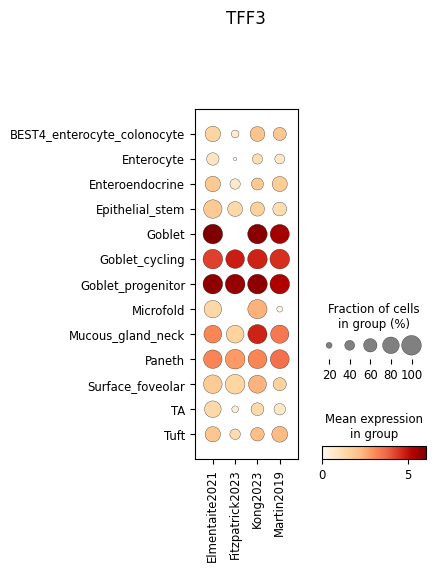

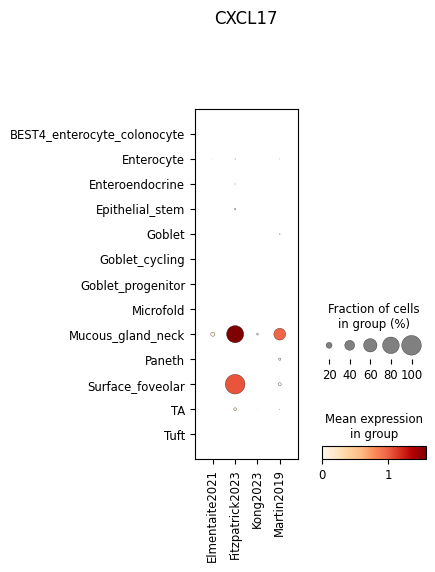

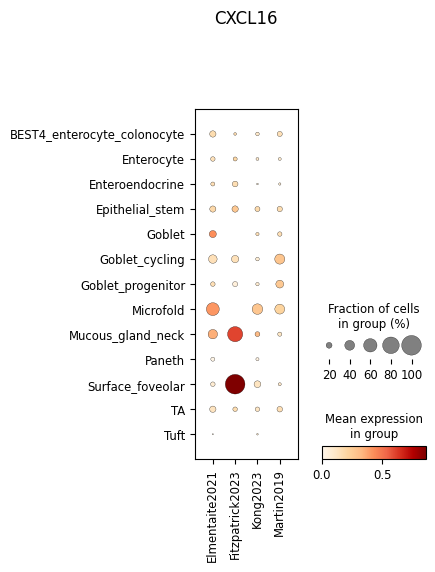

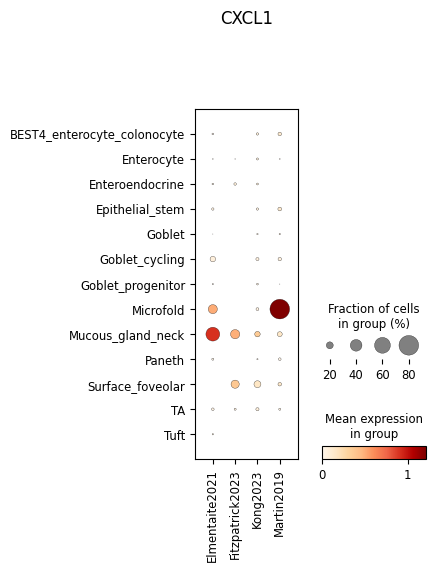

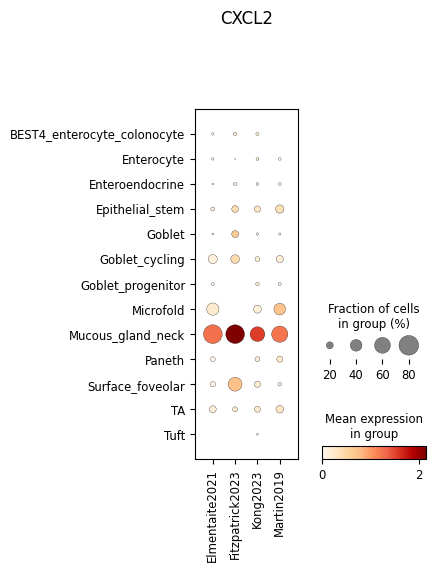

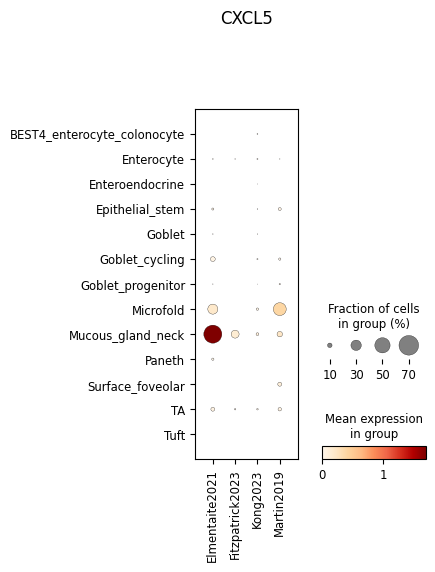

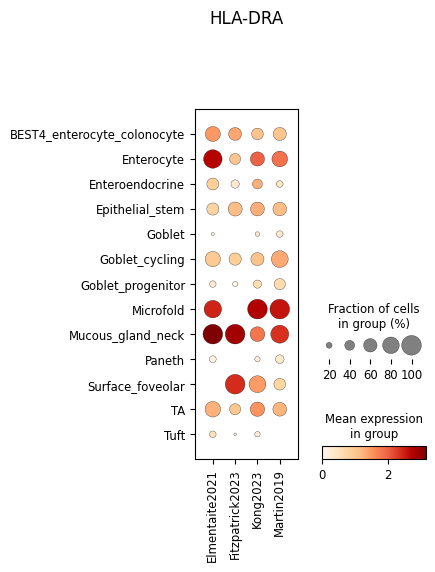

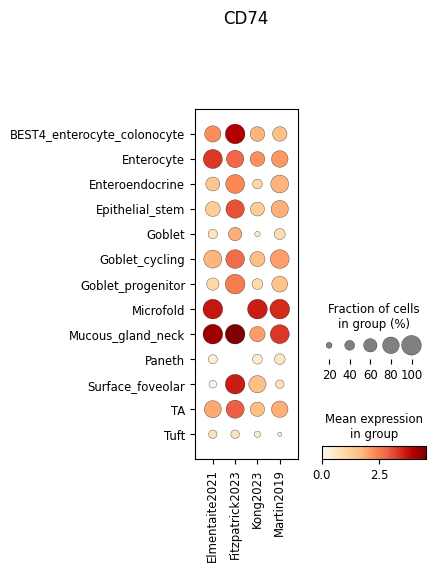

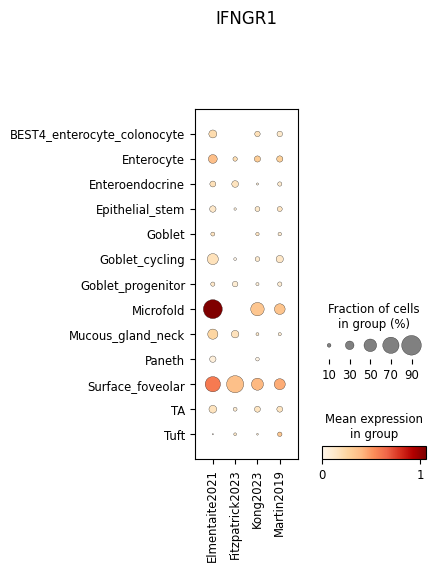

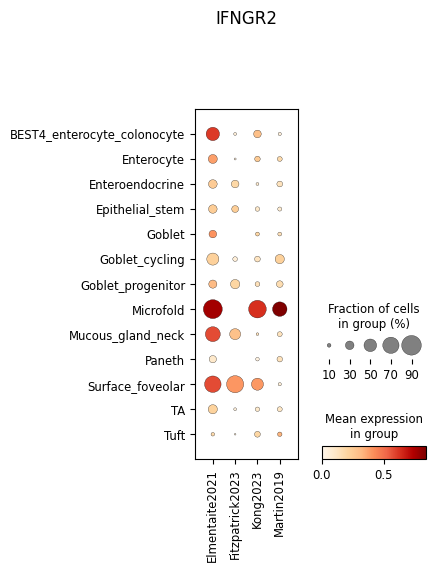

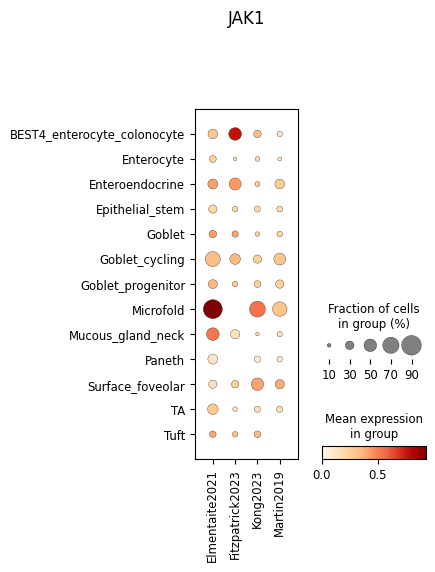

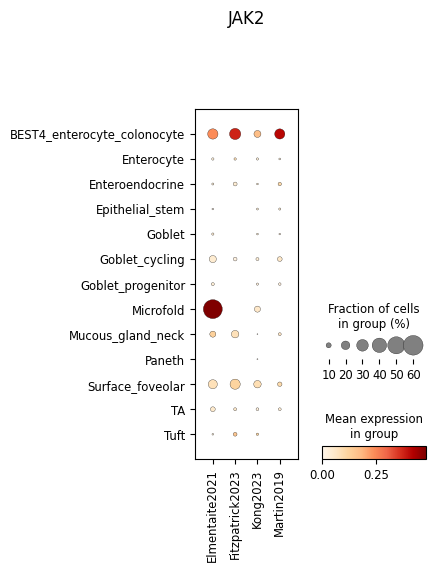

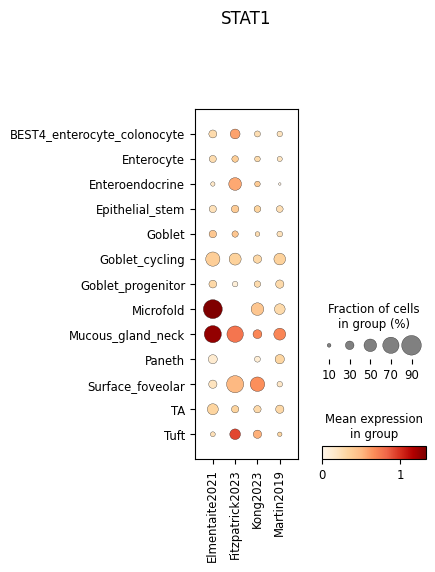

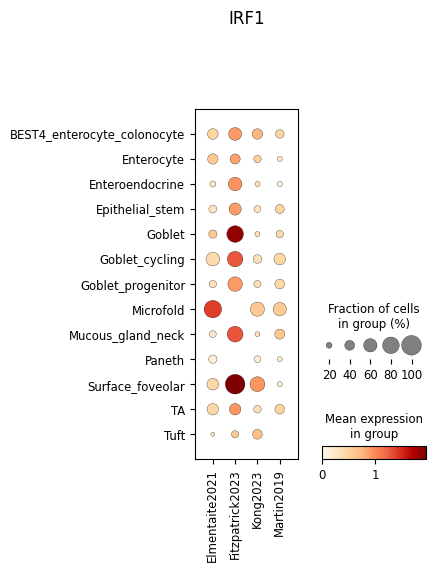

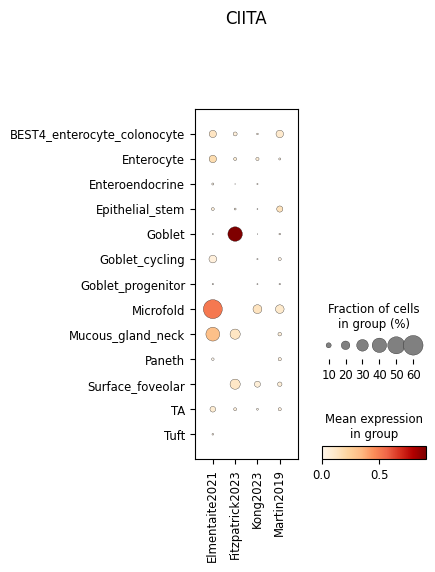

In [36]:
#LEFTY1 plot - Extended data 8i
genes_to_check = ['LEFTY1','MUC6','AQP5','PGC','BPIFB1','OLFM4','MKI67','LGR5','TFF2','TFF3','CXCL17','CXCL16','CXCL1','CXCL2','CXCL5','HLA-DRA','CD74','IFNGR1','IFNGR2','JAK1','JAK2','STAT1','IRF1','CIITA']
for gene in genes_to_check:
    output_file = f'/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/dotplot2obs_disease_epi_SI_celltypevsstudy_{gene}.pdf'
    dotplot_2obs(plot_without_jaeger, gene=gene, y_axis="level_3_annot", x_axis="study", output_file=output_file)

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


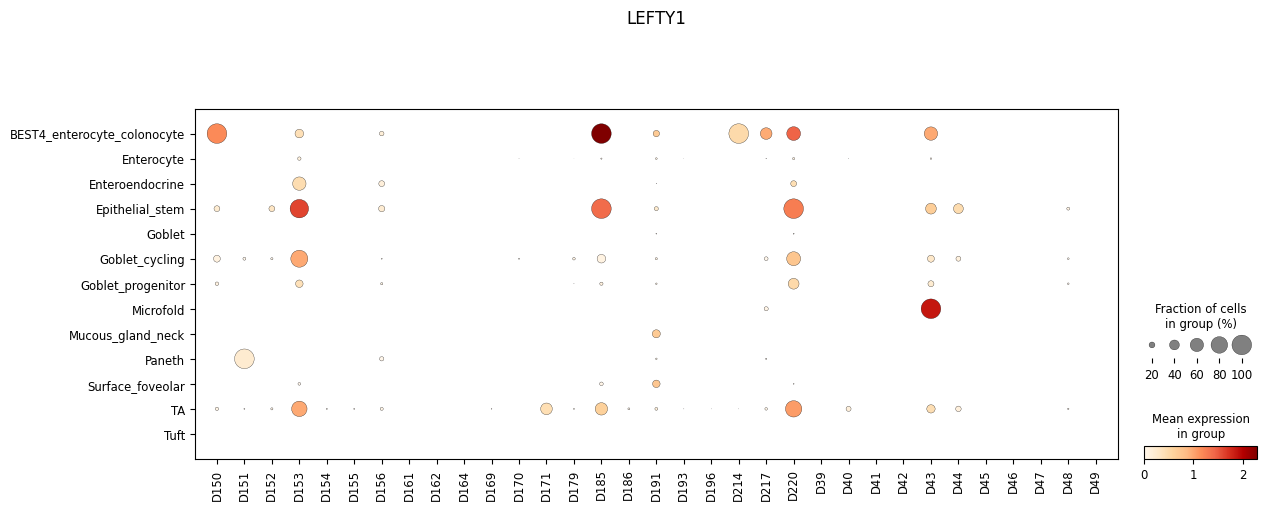

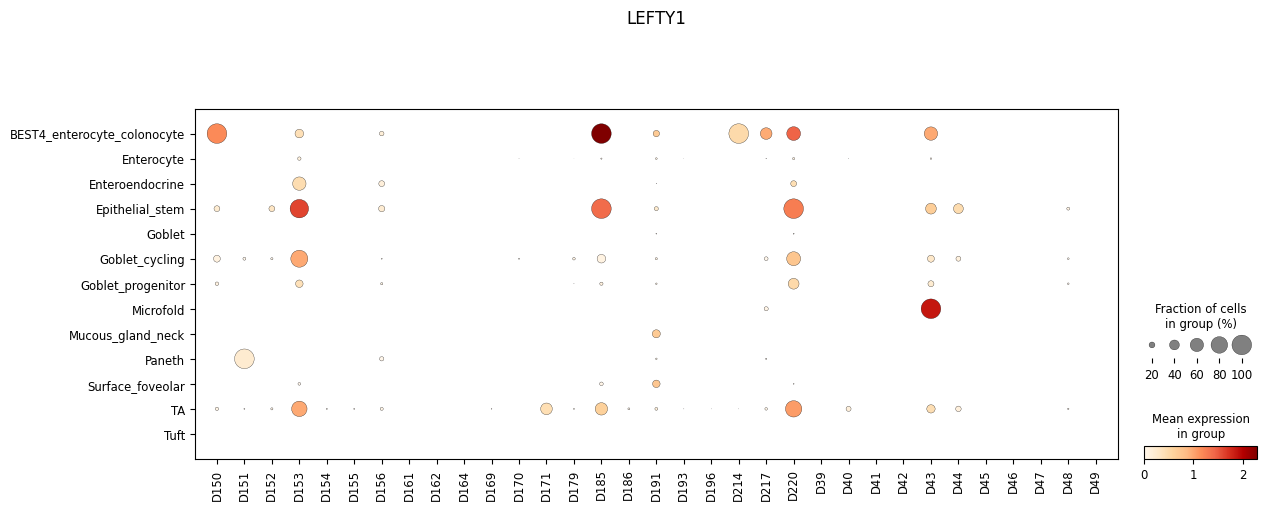

In [37]:
dotplot_2obs(plot_without_jaeger, gene='LEFTY1', y_axis="level_3_annot", x_axis="donorID_unified", output_file='/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/LEFTY1_by_donor.pdf')

In [38]:
plot_stem_muc6 = plot_without_jaeger[plot_without_jaeger.obs.level_3_annot.isin(['Epithelial_stem','Mucous_gland_neck'])].copy()

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


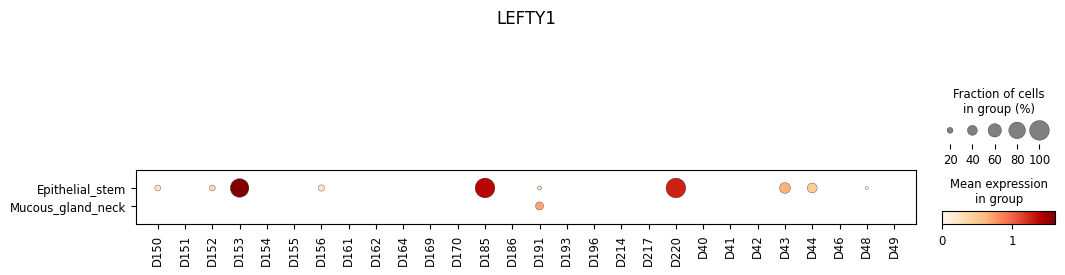

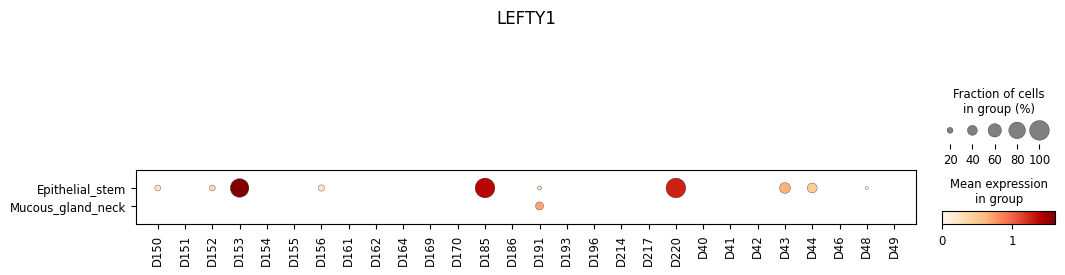

In [39]:
dotplot_2obs(plot_stem_muc6, gene='LEFTY1', y_axis="level_3_annot", x_axis="donorID_unified", output_file='/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/LEFTY1_by_donor_stem_INFLARE.pdf')

In [40]:
muc6_plot = plot[plot.obs.level_3_annot.isin(['Mucous_gland_neck'])].copy()

In [41]:
muc6_plot.obs.donorID_unified.value_counts()

D191    95
D48     58
D164    23
D152     8
D42      4
D41      1
D214     1
D161     1
Name: donorID_unified, dtype: int64

In [42]:
muc6_plot

AnnData object with n_obs × n_vars = 191 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_splic

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


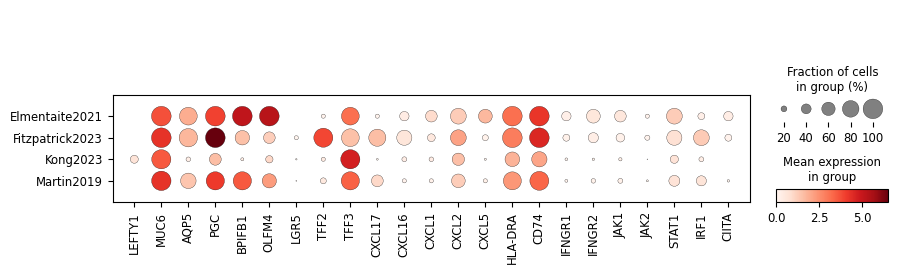

In [43]:
genes_to_check = ['LEFTY1','MUC6','AQP5','PGC','BPIFB1','OLFM4','LGR5','TFF2','TFF3','CXCL17','CXCL16','CXCL1','CXCL2','CXCL5','HLA-DRA','CD74','IFNGR1','IFNGR2','JAK1','JAK2','STAT1','IRF1','CIITA']
sc.pl.dotplot(muc6_plot, var_names = genes_to_check,groupby='study',save='_INFLARE_markers_by_study.pdf')

/home/jovyan/my-conda-envs/d2c/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


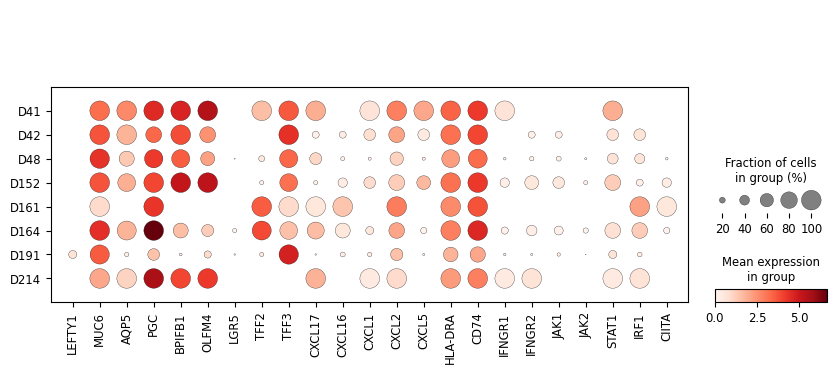

In [44]:
genes_to_check = ['LEFTY1','MUC6','AQP5','PGC','BPIFB1','OLFM4','LGR5','TFF2','TFF3','CXCL17','CXCL16','CXCL1','CXCL2','CXCL5','HLA-DRA','CD74','IFNGR1','IFNGR2','JAK1','JAK2','STAT1','IRF1','CIITA']
sc.pl.dotplot(muc6_plot, var_names = genes_to_check,groupby='donorID_unified',save='_INFLARE_markers_by_donor.pdf')